EDA

Ya los datos están limpios, ahora es tiempo de investigar las relaciones que hay entre las variables de los datasets, ver si hay outliers o anomalías (que no tienen que ser errores necesariamente 👀 ), y ver si hay algún patrón interesante que valga la pena explorar en un análisis posterior. Las nubes de palabras dan una buena idea de cuáles palabras son más frecuentes en los títulos, ¡podría ayudar al sistema de recomendación!😉

In [190]:
#Importamos librerias
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [191]:
df_modelo=pd.read_parquet('ETL y EDA\Data_Movies')

In [192]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45317 entries, 0 to 45316
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45317 non-null  int32  
 1   id                    45317 non-null  int32  
 2   original_language     45306 non-null  object 
 3   overview              44376 non-null  object 
 4   popularity            45317 non-null  float64
 5   release_date          45317 non-null  object 
 6   revenue               45317 non-null  float64
 7   runtime               45071 non-null  float64
 8   status                45237 non-null  object 
 9   tagline               20377 non-null  object 
 10  title                 45317 non-null  object 
 11  vote_average          45317 non-null  float64
 12  vote_count            45317 non-null  float64
 13  collection            766 non-null    object 
 14  genres                45317 non-null  object 
 15  production_companie

In [193]:
df_modelo.head()

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,vote_count,collection,genres,production_companies,production_countries,spoken_languages,release_year,return,cast_members,director
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,None,...,5415.0,Toy Story Collection,"[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America],[English],1995,12.451801,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,...,2413.0,None,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]",1995,4.043035,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston
2,0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,...,92.0,Father of the Bride Collection,"[Romance, Comedy]","[Warner Bros., Lancaster Gate]",[United States of America],[English],1995,0.000000,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch
3,16000000,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,...,34.0,None,"[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation],[United States of America],[English],1995,5.090760,"[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker
4,0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,...,173.0,Balto Collection,[Comedy],"[Sandollar Productions, Touchstone Pictures]",[United States of America],[English],1995,0.000000,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Charles Shyer


In [194]:
df_modelo.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'collection', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'release_year', 'return', 'cast_members', 'director'],
      dtype='object')

El modelo a utilizar para la recomendación sera uno de similutd de cosenos y para este modelo muchas de las columnas del df no son necesarias para aligerar el data set voy a eliminar las que no pienso usar dependiendo los analisis que vayamos haciendo. La información financier no es nada relevante en este modelo por lo que eliminaré todas las colummnas que tengan que ver con esto de igual forma las fechas no juegan un papel tan importante y teniendo tantos datos voy a precindir de ellas. Con este primer analisis decido eliminar igual la columna de status ya que no la encuentro relevante


In [195]:
df_modelo.drop(columns=['budget','release_date', 'revenue','release_year', 'return','status'],inplace=True)

In [196]:
df_modelo.head()

,id,original_language,overview,popularity,runtime,tagline,title,vote_average,vote_count,collection,genres,production_companies,production_countries,spoken_languages,cast_members,director
0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,81.0,None,Toy Story,7.7,5415.0,Toy Story Collection,"[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America],[English],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter
1,8844,en,When siblings Judy and Peter discover an encha...,17.015539,104.0,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,None,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston
2,15602,en,A family wedding reignites the ancient feud be...,11.712900,101.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,Father of the Bride Collection,"[Romance, Comedy]","[Warner Bros., Lancaster Gate]",[United States of America],[English],"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch
3,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,127.0,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,None,"[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation],[United States of America],[English],"[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker
4,11862,en,Just when George Banks has recovered from his ...,8.387519,106.0,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,Balto Collection,[Comedy],"[Sandollar Productions, Touchstone Pictures]",[United States of America],[English],"[Steve Martin, Diane Keaton, Martin Short, Kim...",Charles Shyer


In [197]:
#Checamos duplicados en titulo en id no lo hago por que lo hice en el etl
x=df_modelo['title'].duplicated().sum()
print(x)
x=df_modelo['id'].duplicated().sum()
print(x)

3144
0


In [198]:
#Eliminamos los duplicados
df_modelo = df_modelo.drop_duplicates(subset=['title'])

In [199]:
#Datos estadisticos de las columnas numericas 
df_modelo.describe()

,id,popularity,runtime,vote_average,vote_count
count,42173.000000,42173.000000,41934.000000,42173.000000,42173.000000
mean,106682.263581,2.913213,93.851505,5.631259,109.415906
std,111717.716691,5.745248,37.691887,1.921370,489.470286
min,2.000000,0.000000,0.000000,0.000000,0.000000
25%,25803.000000,0.387385,85.000000,5.000000,3.000000
50%,58390.000000,1.135700,95.000000,6.000000,10.000000
75%,152948.000000,3.714997,107.000000,6.800000,35.000000
max,469172.000000,547.488298,1256.000000,10.000000,14075.000000


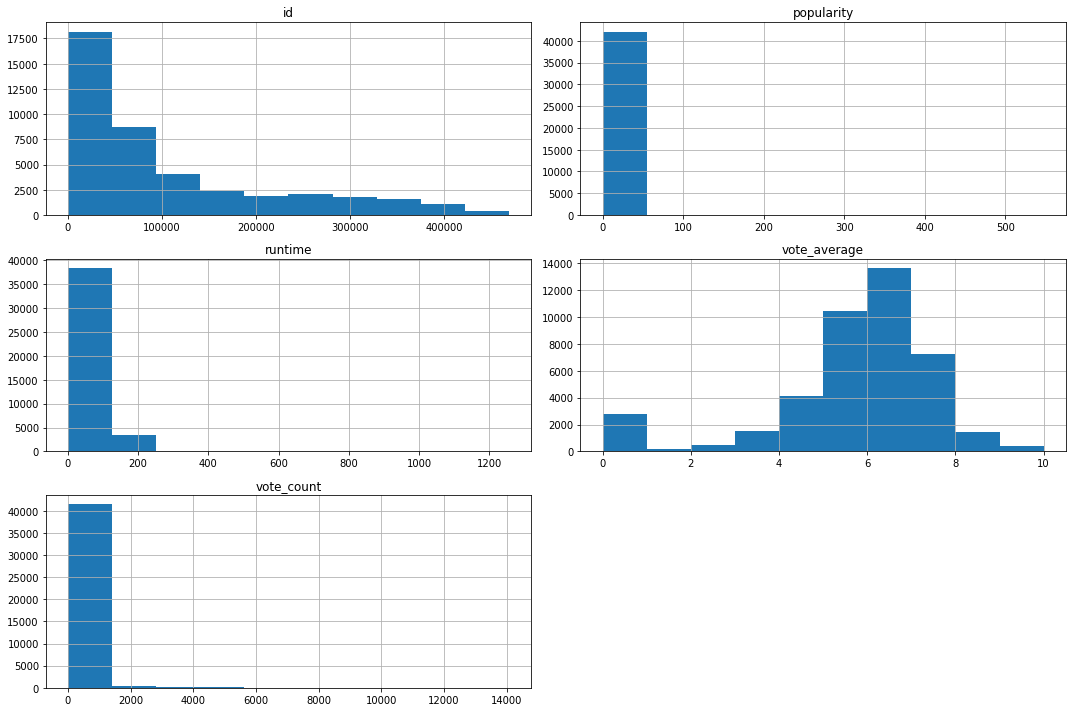

In [200]:
#Distribucion de las variables
df_modelo.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

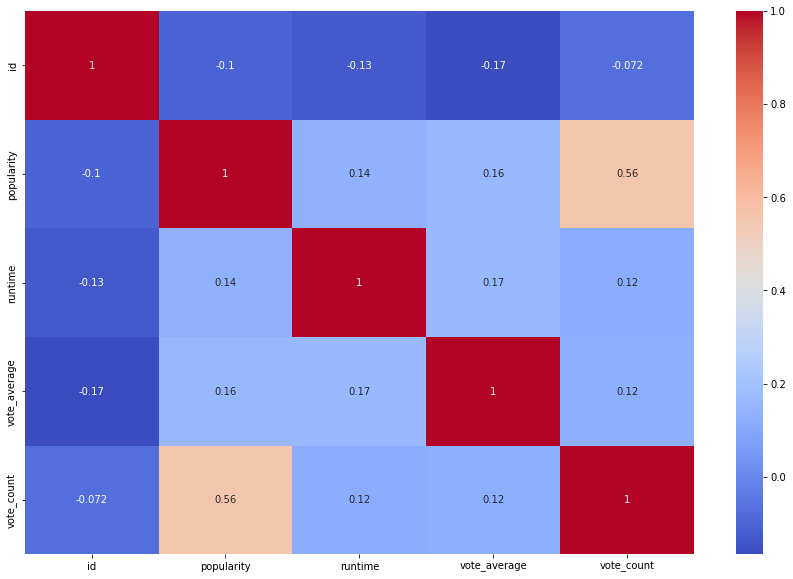

In [201]:
#Correlaciones
x=df_modelo.select_dtypes(exclude = ['object'])
y=x.corr()
plt.figure(figsize=(15,10))
sns.heatmap(y, annot=True, cmap='coolwarm')
plt.show()

Veo que las unicas variables con una correlacion considerable es value_count con popularity al tener una correlacion muy baja y no aportar mas al modelo voy a eliminar las demás columnas, lo que me dice la correlacion alta es que mientras mas votos nos indica que la pelicula es más popular 

In [202]:
df_modelo.drop(columns=['runtime','vote_average','id'],inplace=True)

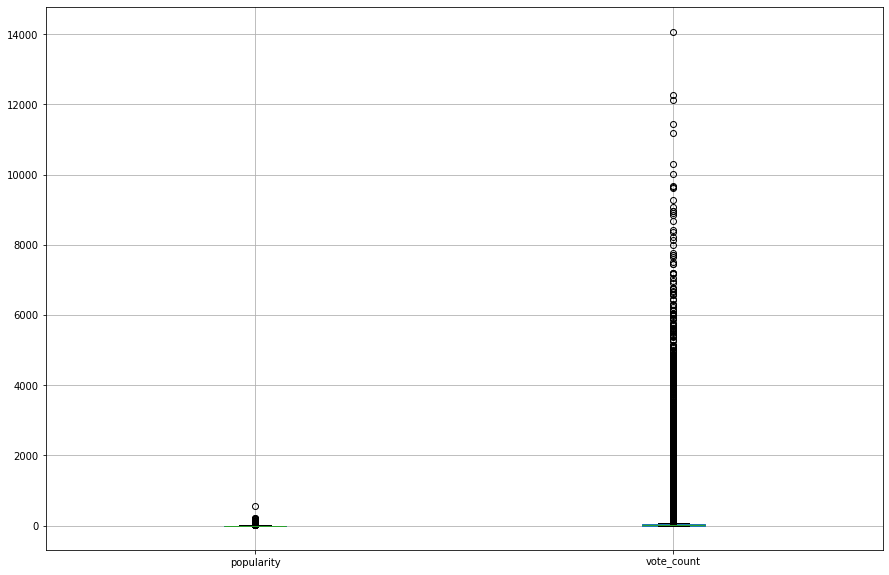

In [203]:
#Outliers
plt.figure(figsize=(15, 10))  
df_modelo.boxplot()
plt.show()

Value_count tiene muchos outliers por lo que no veo sentio de mantenerlo lo eliminamos y al eliminarlo no tiene sentido que nos quedemos con popularidad por lo que lo quitamos igual

In [204]:
df_modelo.drop(columns=['popularity','vote_count'],inplace=True)

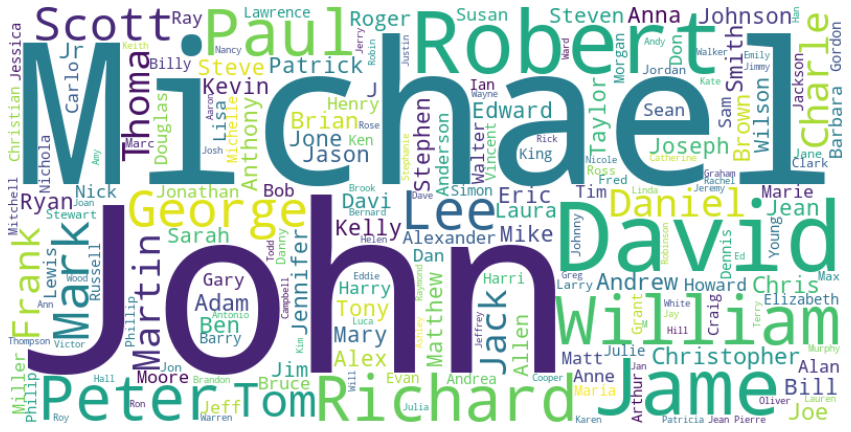

In [205]:
#Nubes de palabras 
#Checaremos la nube de palabras para ver los actores, los titulos y las sinopsis 
#Extraemos los datos de la columna de actores
def to_string(x):
    if isinstance(x, list):
        return ' '.join(map(str, x))
    elif isinstance(x, np.ndarray):
        return ' '.join(map(str, x.tolist()))
    elif isinstance(x, str):
        return x
    else:
        return str(x)

df_modelo['cast_members']=df_modelo['cast_members'].apply(to_string)
q=''.join(df_modelo['cast_members'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(q)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [206]:
#Veo cuales se repiten mas 
frecuentes=wordcloud.words_
print(frecuentes)

{'John': 1.0, 'Michael': 0.8596123624934521, 'David': 0.7611314824515453, 'Robert': 0.6741749607124149, 'Jame': 0.5675746464117339, 'William': 0.5521215295966475, 'Paul': 0.48166579360921946, 'Richard': 0.46306966998428495, 'Peter': 0.4476165531691985, 'Lee': 0.34363541121005764, 'George': 0.32765845992666315, 'Mark': 0.31953902566788894, 'Scott': 0.2786799371398638, 'Tom': 0.2757988475641697, 'Daniel': 0.2757988475641697, 'Charle': 0.2744892613933997, 'Martin': 0.2647983237297014, 'Thoma': 0.25903614457831325, 'Frank': 0.25196437925615506, 'Jack': 0.24122577265584075, 'Christopher': 0.2357255107386066, 'Adam': 0.22577265584075432, 'Smith': 0.22367731796752227, 'Andrew': 0.22210581456259823, 'Chris': 0.21922472498690415, 'Brian': 0.21293871136720796, 'Joe': 0.21136720796228392, 'Brown': 0.20560502881089576, 'Jone': 0.19381875327396542, 'Steve': 0.19146149816657937, 'Anthony': 0.1885804085908853, 'Patrick': 0.18753273965426925, 'Bill': 0.18648507071765322, 'Tony': 0.18308014667365113, '

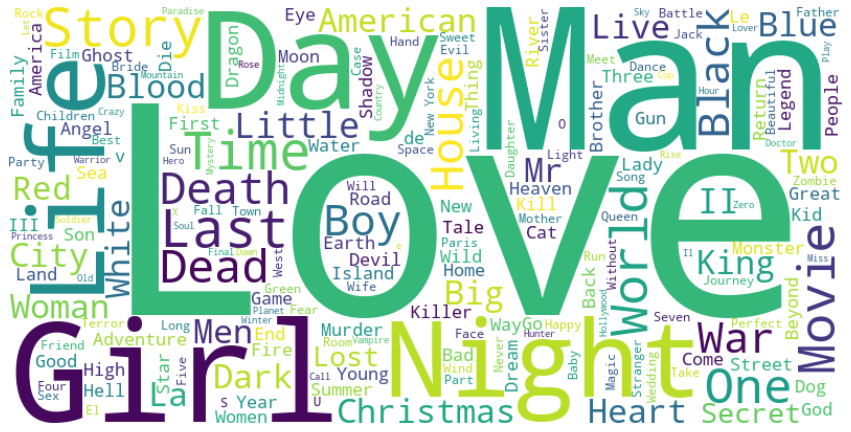

In [207]:
#Titulo
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_modelo['title'].dropna()))

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()




In [208]:
#Veo cuales se repiten mas 
frecuentes=wordcloud.words_
print(frecuentes)

{'Love': 1.0, 'Man': 0.9493670886075949, 'Girl': 0.6629746835443038, 'Day': 0.6329113924050633, 'Night': 0.5886075949367089, 'Life': 0.5806962025316456, 'Story': 0.4920886075949367, 'Time': 0.48575949367088606, 'Last': 0.4810126582278481, 'Movie': 0.44462025316455694, 'World': 0.44145569620253167, 'One': 0.38924050632911394, 'Dead': 0.3623417721518987, 'House': 0.36075949367088606, 'Death': 0.3575949367088608, 'Boy': 0.3401898734177215, 'War': 0.33860759493670883, 'Black': 0.33544303797468356, 'Little': 0.3322784810126582, 'II': 0.3212025316455696, 'Christmas': 0.314873417721519, 'Live': 0.3069620253164557, 'American': 0.30537974683544306, 'City': 0.3037974683544304, 'Blood': 0.30063291139240506, 'King': 0.29430379746835444, 'Blue': 0.2879746835443038, 'Mr': 0.2800632911392405, 'La': 0.27689873417721517, 'Dark': 0.27689873417721517, 'Men': 0.27531645569620256, 'Big': 0.2737341772151899, 'Woman': 0.2721518987341772, 'Heart': 0.2689873417721519, 'White': 0.26582278481012656, 'Two': 0.261

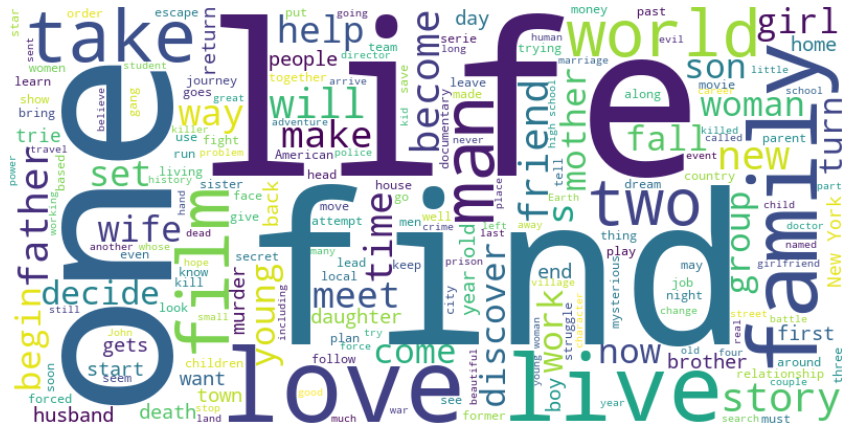

In [209]:
#Overview
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_modelo['overview'].dropna()))

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [210]:
#Veo cuales se repiten mas 
frecuentes=wordcloud.words_
print(frecuentes)

{'life': 1.0, 'find': 0.9729632945389436, 'one': 0.9054610564010743, 'love': 0.7770814682184423, 'family': 0.6386750223813787, 'live': 0.6264995523724262, 'take': 0.582094897045658, 'man': 0.578692927484333, 'film': 0.5679498657117279, 'world': 0.5520143240823635, 'two': 0.5285586392121755, 'story': 0.5244404655326768, 'will': 0.5224709042076991, 'father': 0.5038495971351835, 'new': 0.499373321396598, 'become': 0.4952551477170994, 'friend': 0.493822739480752, 'time': 0.4717994628469114, 'make': 0.45192479856759177, 'meet': 0.43437779767233664, 's': 0.42900626678603404, 'way': 0.42649955237242615, 'help': 0.42649955237242615, 'wife': 0.40465532676812893, 'set': 0.40250671441360786, 'work': 0.37242614145031333, 'young': 0.3674127126230976, 'begin': 0.36168307967770813, 'girl': 0.3566696508504924, 'fall': 0.3523724261414503, 'come': 0.3520143240823635, 'discover': 0.3511190689346464, 'woman': 0.3470008952551477, 'son': 0.3430617726051925, 'mother': 0.3428827215756491, 'now': 0.33786929274

In [211]:
df_modelo.head()

,original_language,overview,tagline,title,collection,genres,production_companies,production_countries,spoken_languages,cast_members,director
0,en,"Led by Woody, Andy's toys live happily in his ...",None,Toy Story,Toy Story Collection,"[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America],[English],Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,John Lasseter
1,en,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji,None,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]",Robin Williams Jonathan Hyde Kirsten Dunst Bra...,Joe Johnston
2,en,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,Father of the Bride Collection,"[Romance, Comedy]","[Warner Bros., Lancaster Gate]",[United States of America],[English],Walter Matthau Jack Lemmon Ann-Margret Sophia ...,Howard Deutch
3,en,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,Waiting to Exhale,None,"[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation],[United States of America],[English],Whitney Houston Angela Bassett Loretta Devine ...,Forest Whitaker
4,en,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,Balto Collection,[Comedy],"[Sandollar Productions, Touchstone Pictures]",[United States of America],[English],Steve Martin Diane Keaton Martin Short Kimberl...,Charles Shyer


Veo que aun tengo muchas columnas que no me dicen ni aportan nada, vamos a eliminar el tagline ya que con el overview es mas que suficiente, las columnas de idiomas igual ya que no es informacion tan determinante a la hora de aplicar al modelo, el país de produccion igual y al tener tantos datos vamos a eliminar tambien la productora aunque esta columna si nos puede llegar a aportar nos vamos a inclinar hacia el director y actor 

In [212]:
df_modelo.drop(columns=['tagline','production_companies','production_countries','spoken_languages','original_language'],inplace=True)

In [213]:
df_modelo.head()

,overview,title,collection,genres,cast_members,director
0,"Led by Woody, Andy's toys live happily in his ...",Toy Story,Toy Story Collection,"[Animation, Comedy, Family]",Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,John Lasseter
1,When siblings Judy and Peter discover an encha...,Jumanji,None,"[Adventure, Fantasy, Family]",Robin Williams Jonathan Hyde Kirsten Dunst Bra...,Joe Johnston
2,A family wedding reignites the ancient feud be...,Grumpier Old Men,Father of the Bride Collection,"[Romance, Comedy]",Walter Matthau Jack Lemmon Ann-Margret Sophia ...,Howard Deutch
3,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale,None,"[Comedy, Drama, Romance]",Whitney Houston Angela Bassett Loretta Devine ...,Forest Whitaker
4,Just when George Banks has recovered from his ...,Father of the Bride Part II,Balto Collection,[Comedy],Steve Martin Diane Keaton Martin Short Kimberl...,Charles Shyer


In [214]:
#Observamos que el genero sigue en una lista por lo que debemos pasarlo a un str 
df_modelo['genres'] = df_modelo['genres'].apply(lambda x: ', '.join(x))

In [215]:
df_modelo.head()

,overview,title,collection,genres,cast_members,director
0,"Led by Woody, Andy's toys live happily in his ...",Toy Story,Toy Story Collection,"Animation, Comedy, Family",Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,John Lasseter
1,When siblings Judy and Peter discover an encha...,Jumanji,None,"Adventure, Fantasy, Family",Robin Williams Jonathan Hyde Kirsten Dunst Bra...,Joe Johnston
2,A family wedding reignites the ancient feud be...,Grumpier Old Men,Father of the Bride Collection,"Romance, Comedy",Walter Matthau Jack Lemmon Ann-Margret Sophia ...,Howard Deutch
3,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale,None,"Comedy, Drama, Romance",Whitney Houston Angela Bassett Loretta Devine ...,Forest Whitaker
4,Just when George Banks has recovered from his ...,Father of the Bride Part II,Balto Collection,Comedy,Steve Martin Diane Keaton Martin Short Kimberl...,Charles Shyer


In [216]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42173 entries, 0 to 45316
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   overview      41271 non-null  object
 1   title         42173 non-null  object
 2   collection    755 non-null    object
 3   genres        42173 non-null  object
 4   cast_members  42173 non-null  object
 5   director      41347 non-null  object
dtypes: object(6)
memory usage: 2.3+ MB


El dataset sigue siendo muy grande eliminar los nulos podría aligerar el data set pero si dejo collection quedaría muy pequeño y al no tener tantos datos en collection voy a elimnarla y despues eliminar los datos nulos si es que hay 

In [217]:
df_modelo.drop(columns=['collection'],inplace=True)

In [218]:
df_modelo=df_modelo.dropna()

In [219]:
#Con esto termino mi EDA y exporto el data set fianl 
df_modelo.to_parquet('Data_Modelo', index=False)

In [220]:
df_modelo.head()

,overview,title,genres,cast_members,director
0,"Led by Woody, Andy's toys live happily in his ...",Toy Story,"Animation, Comedy, Family",Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,John Lasseter
1,When siblings Judy and Peter discover an encha...,Jumanji,"Adventure, Fantasy, Family",Robin Williams Jonathan Hyde Kirsten Dunst Bra...,Joe Johnston
2,A family wedding reignites the ancient feud be...,Grumpier Old Men,"Romance, Comedy",Walter Matthau Jack Lemmon Ann-Margret Sophia ...,Howard Deutch
3,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale,"Comedy, Drama, Romance",Whitney Houston Angela Bassett Loretta Devine ...,Forest Whitaker
4,Just when George Banks has recovered from his ...,Father of the Bride Part II,Comedy,Steve Martin Diane Keaton Martin Short Kimberl...,Charles Shyer


In [221]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40514 entries, 0 to 45316
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   overview      40514 non-null  object
 1   title         40514 non-null  object
 2   genres        40514 non-null  object
 3   cast_members  40514 non-null  object
 4   director      40514 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB
